In [ ]:
#@title Load libraries
!pip install -q face_recognition
!pip install -q fer
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.patches as patches
%matplotlib inline
import face_recognition
import numpy as np
from PIL import ImageDraw
import PIL.Image
#from io import BytesIO
from fer import FER
#import cv2
import operator
import time
from google.colab import files
from google.colab.patches import cv2_imshow
detector = FER()

     |████████████████████████████████| 100.2MB 106kB/s 
     |████████████████████████████████| 819kB 39.4MB/s 
     |████████████████████████████████| 2.3MB 44.2MB/s 
Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Colocations handled automatically by placer.


28-05-2021:03:40:40,699 WARNING  [deprecation.py:336] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/layers/normalization.py:534: _colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [ ]:
#@title Upload image with faces
uploaded = files.upload() #https://unsplash.com

Saving omar-lopez-T6zu4jFhVwg-unsplash.jpg to omar-lopez-T6zu4jFhVwg-unsplash.jpg


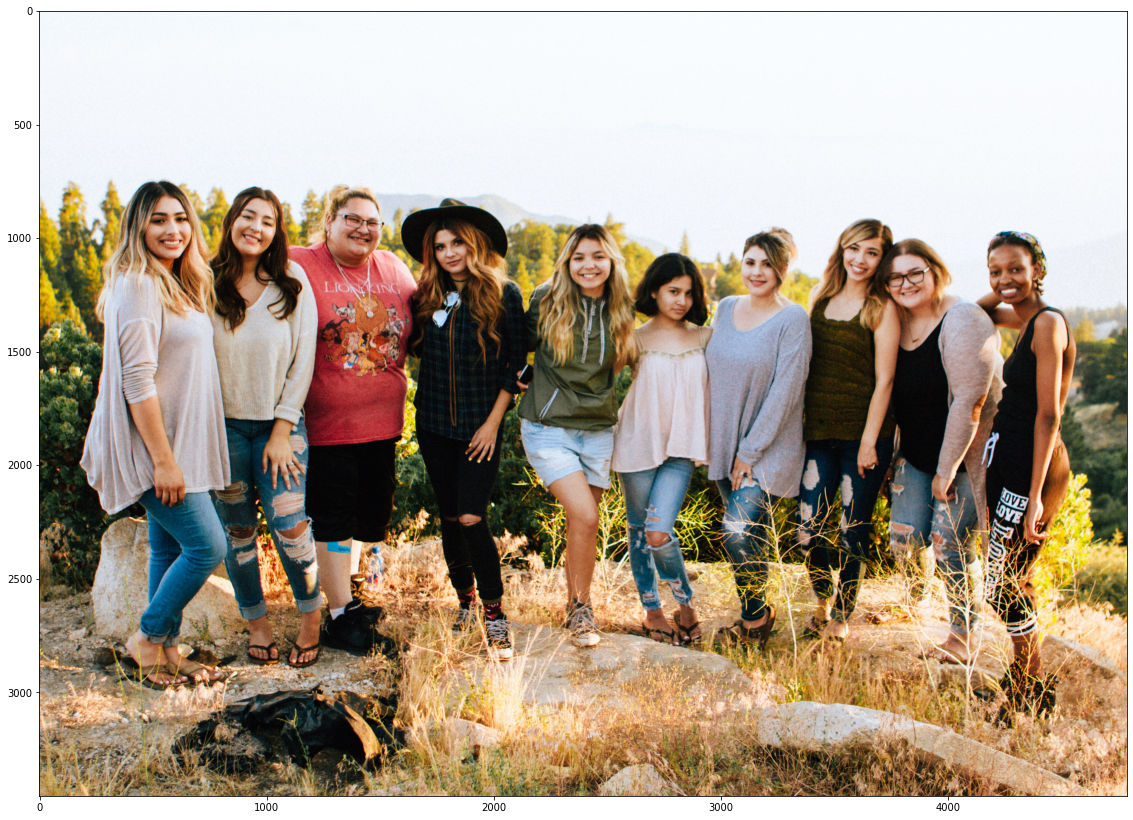

In [ ]:
#@title Display image
image = face_recognition.load_image_file(list(uploaded.keys())[0])
boundary = 24
im = PIL.Image.open(list(uploaded.keys())[0])
height = (im.size[1] / im.size[0]) * 20
fig=plt.subplots(figsize=(20,height))
imshow(im)

Number of faces: 10
Time taken: 12.63  seconds


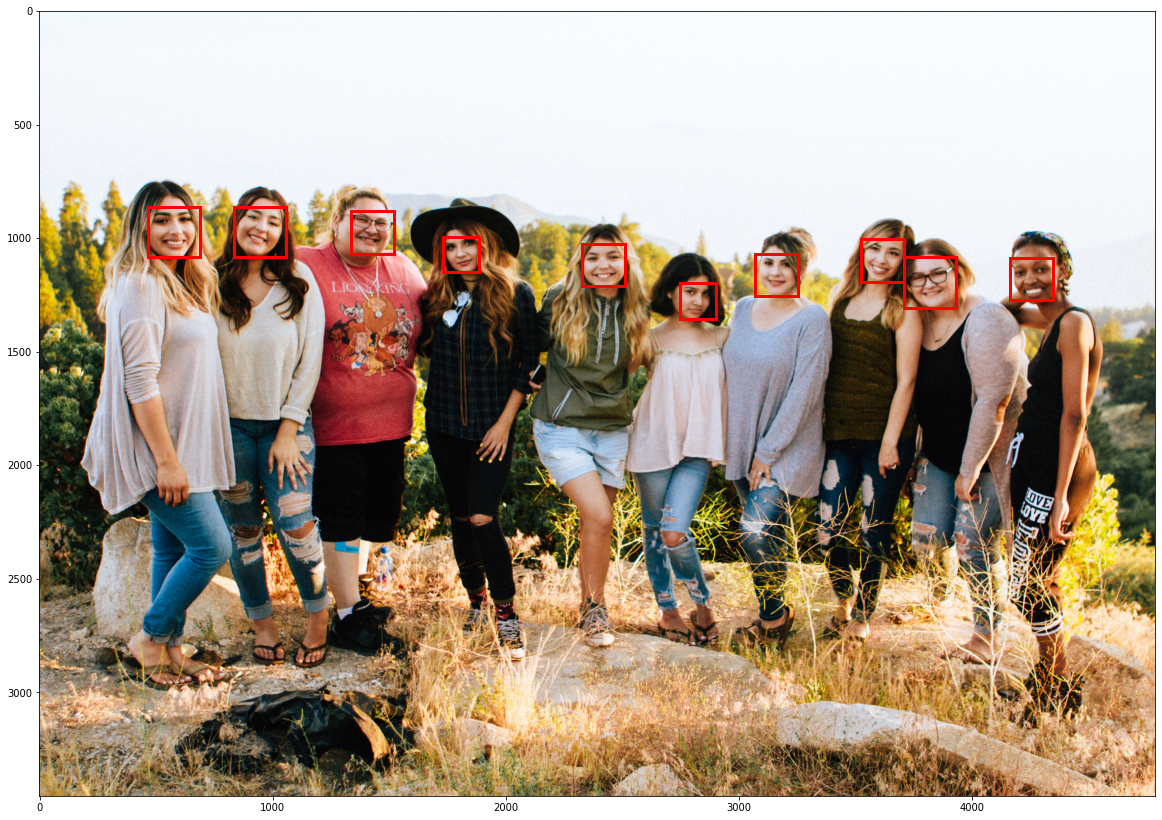

In [ ]:
#@title Use 'Face Recognition' library and draw a red box around the faces
start = time.time()
face_locations = face_recognition.face_locations(image)
fig,ax = plt.subplots(figsize=(20,height))
for face_location in face_locations:
    top, right, bottom, left = face_location 
    ax.imshow(im,aspect='auto')
    rect = patches.Rectangle((left,top), (right - left), (bottom-top),linewidth=3,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
end = time.time()
print("Number of faces:",len(face_locations))
print("Time taken:",round(end-start,2)," seconds")

Number of faces: 10
Time taken: 42.623937129974365  seconds


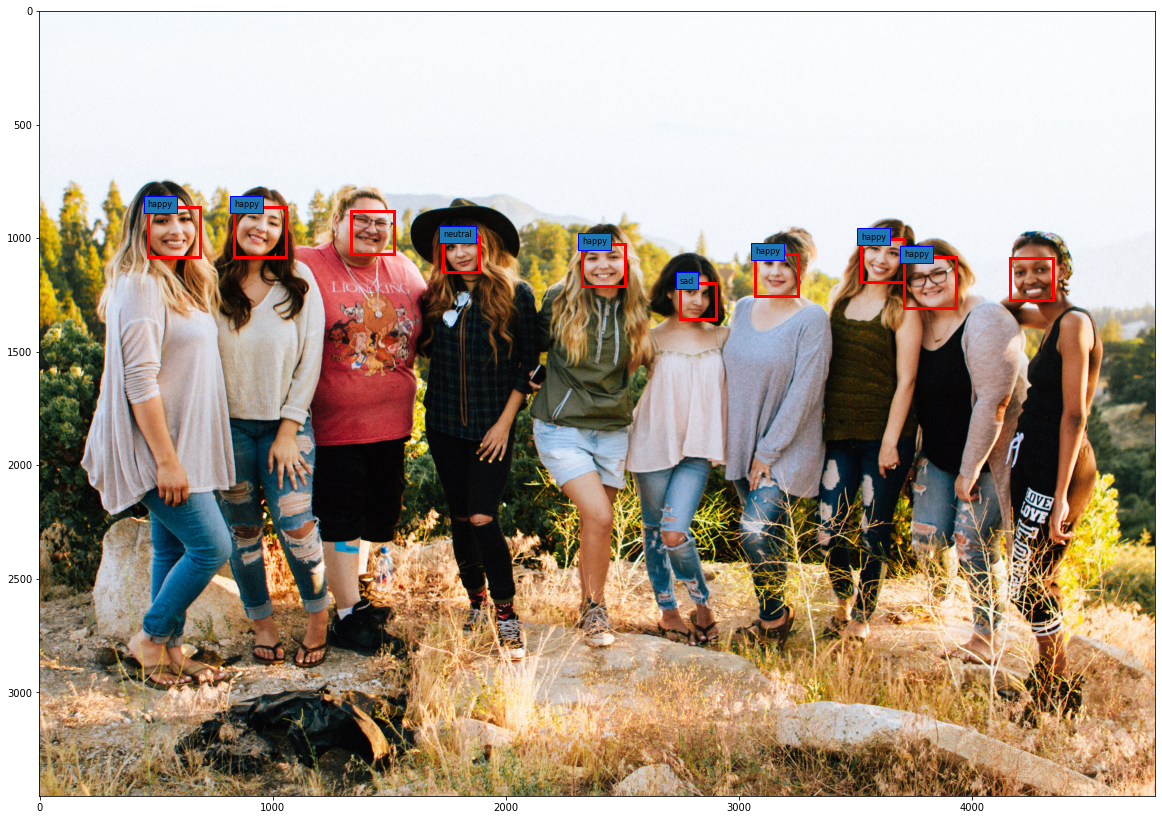

In [ ]:
#@title Use 'Face Recognition' library and draw a red box around the faces as well as predicted emotion
start = time.time()
face_locations = face_recognition.face_locations(image)
fig,ax = plt.subplots(figsize=(20,height))
for face_location in face_locations:
    top, right, bottom, left = face_location 
    ax.imshow(im,aspect='auto')
    rect = patches.Rectangle((left,top), (right - left), (bottom-top),linewidth=3,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    face_image = image[top-boundary:bottom+boundary, left-boundary:right+boundary]
    attribute = detector.detect_emotions(face_image)
    if (not attribute) == False:
      emotion = max(attribute[0]['emotions'].items(),key=operator.itemgetter(1))[0]
      #print(emotion)
      plt.text(left, top, emotion, fontsize=8, bbox=dict(fill=True, edgecolor='blue', linewidth=1))
end = time.time()
print("Number of faces:",len(face_locations))
print("Time taken:",end-start," seconds")